In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
%matplotlib inline

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import util

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [5]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
153,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1
63,45.0,0,582,0,35,0,385000.00,1.00,145,1,0,61,1
102,80.0,0,898,0,25,0,149000.00,1.10,144,1,1,87,0
194,45.0,0,582,0,20,1,126000.00,1.60,135,1,0,180,1


# Create Model 

In [6]:
import models

# set initial bias
neg, pos = np.bincount(df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])

mobj = models.modelObj()
model = mobj.create_model(len(train.keys())-1, bias = initial_bias)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


# Normalize Data

In [7]:
train_y = train.pop('DEATH_EVENT')
train_x = util.norm(train)
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.181818,0.0,0.232585,1.0,0.375000,0.0,0.288833,0.076404,0.75000,1.0,1.0,0.409253
1,0.254545,1.0,0.051544,0.0,1.000000,1.0,0.152625,0.955056,0.75000,0.0,0.0,0.683274
2,0.090909,0.0,0.071319,0.0,0.375000,0.0,0.436295,0.056180,1.00000,1.0,0.0,0.202847
3,0.727273,0.0,0.111636,0.0,0.196429,0.0,0.150200,0.067416,0.96875,1.0,1.0,0.295374
4,0.090909,0.0,0.071319,0.0,0.107143,1.0,0.122318,0.123596,0.68750,1.0,0.0,0.626335


# Train Model

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [9]:
non_resampled_history = model.fit(
    train_x,
    train_y,
    batch_size=mobj.BATCH_SIZE,
    epochs=mobj.EPOCHS,
    callbacks = [early_stopping, models.printDot()],
    validation_split=0.2)

Train on 191 samples, validate on 48 samples
Epoch 1/100
191/191 [==============================] - 7s 35ms/sample - loss: 0.6374 - tp: 7.0000 - fp: 8.0000 - tn: 116.0000 - fn: 60.0000 - accuracy: 0.6440 - precision: 0.4667 - recall: 0.1045 - auc: 0.5738 - val_loss: 0.5843 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 36.0000 - val_fn: 12.0000 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4734
Epoch 2/100
191/191 [==============================] - 0s 921us/sample - loss: 0.6656 - tp: 5.0000 - fp: 8.0000 - tn: 116.0000 - fn: 62.0000 - accuracy: 0.6335 - precision: 0.3846 - recall: 0.0746 - auc: 0.5002 - val_loss: 0.5830 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 36.0000 - val_fn: 12.0000 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4884
Epoch 3/100
191/191 [==============================] - 0s 908us/sample - loss: 0.6352 - tp: 7.0000 - fp: 10.0000 - tn: 114.0000 - fn: 60.0000 - accuracy

191/191 [==============================] - 0s 1ms/sample - loss: 0.6127 - tp: 6.0000 - fp: 2.0000 - tn: 122.0000 - fn: 61.0000 - accuracy: 0.6702 - precision: 0.7500 - recall: 0.0896 - auc: 0.6624 - val_loss: 0.5504 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 36.0000 - val_fn: 12.0000 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7986
Epoch 21/100
191/191 [==============================] - 0s 1ms/sample - loss: 0.6182 - tp: 6.0000 - fp: 4.0000 - tn: 120.0000 - fn: 61.0000 - accuracy: 0.6597 - precision: 0.6000 - recall: 0.0896 - auc: 0.6428 - val_loss: 0.5486 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 36.0000 - val_fn: 12.0000 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8056
Epoch 22/100
191/191 [==============================] - 0s 1ms/sample - loss: 0.6209 - tp: 4.0000 - fp: 2.0000 - tn: 122.0000 - fn: 63.0000 - accuracy: 0.6597 - precision: 0.6667 - recall: 0.0597 - auc: 0.6267 -

Epoch 40/100
191/191 [==============================] - 0s 1ms/sample - loss: 0.5854 - tp: 14.0000 - fp: 2.0000 - tn: 122.0000 - fn: 53.0000 - accuracy: 0.7120 - precision: 0.8750 - recall: 0.2090 - auc: 0.7321 - val_loss: 0.5146 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 36.0000 - val_fn: 10.0000 - val_accuracy: 0.7917 - val_precision: 1.0000 - val_recall: 0.1667 - val_auc: 0.8704
Epoch 41/100
191/191 [==============================] - 0s 1ms/sample - loss: 0.6045 - tp: 14.0000 - fp: 6.0000 - tn: 118.0000 - fn: 53.0000 - accuracy: 0.6911 - precision: 0.7000 - recall: 0.2090 - auc: 0.6754 - val_loss: 0.5130 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 36.0000 - val_fn: 10.0000 - val_accuracy: 0.7917 - val_precision: 1.0000 - val_recall: 0.1667 - val_auc: 0.8727
Epoch 42/100
191/191 [==============================] - 0s 1ms/sample - loss: 0.5956 - tp: 11.0000 - fp: 7.0000 - tn: 117.0000 - fn: 56.0000 - accuracy: 0.6702 - precision: 0.6111 - recall: 0.1642 - auc: 0.7111 - val_los

191/191 [==============================] - 0s 1ms/sample - loss: 0.5620 - tp: 17.0000 - fp: 5.0000 - tn: 119.0000 - fn: 50.0000 - accuracy: 0.7120 - precision: 0.7727 - recall: 0.2537 - auc: 0.7697 - val_loss: 0.4800 - val_tp: 4.0000 - val_fp: 1.0000 - val_tn: 35.0000 - val_fn: 8.0000 - val_accuracy: 0.8125 - val_precision: 0.8000 - val_recall: 0.3333 - val_auc: 0.8958
Epoch 61/100
191/191 [==============================] - 0s 1ms/sample - loss: 0.5599 - tp: 20.0000 - fp: 7.0000 - tn: 117.0000 - fn: 47.0000 - accuracy: 0.7173 - precision: 0.7407 - recall: 0.2985 - auc: 0.7685 - val_loss: 0.4772 - val_tp: 5.0000 - val_fp: 1.0000 - val_tn: 35.0000 - val_fn: 7.0000 - val_accuracy: 0.8333 - val_precision: 0.8333 - val_recall: 0.4167 - val_auc: 0.8993
Epoch 62/100
191/191 [==============================] - 0s 1ms/sample - loss: 0.5817 - tp: 14.0000 - fp: 10.0000 - tn: 114.0000 - fn: 53.0000 - accuracy: 0.6702 - precision: 0.5833 - recall: 0.2090 - auc: 0.7227 - val_loss: 0.4741 - val_tp: 4.

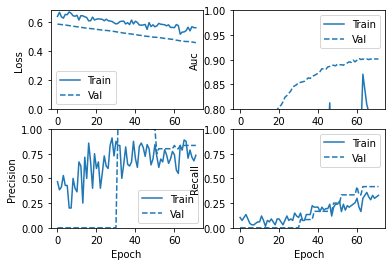

In [10]:
util.plot_metrics(non_resampled_history)

# Evaluate the Model

In [11]:
test_y = test.pop('DEATH_EVENT')
test_x = test
test_predictions_no_r = model.predict(test_x, batch_size=mobj.BATCH_SIZE)

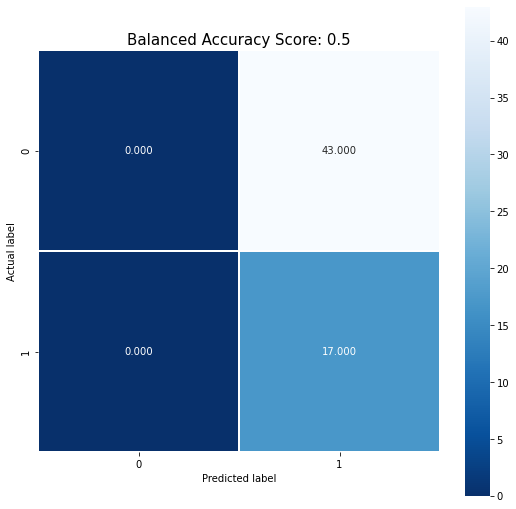

In [12]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

bscore_no_res = balanced_accuracy_score(test_y, test_predictions_no_r)

cm = confusion_matrix(test_y, test_predictions_no_r)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Balanced Accuracy Score: {0}'.format(bscore_no_res)
plt.title(all_sample_title, size = 15);

In [13]:
no_res_results = model.evaluate(test_x, test_y,
                                  batch_size=mobj.BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, no_res_results):
  print(name, ': ', value)
print()

loss :  27714.370442708332
tp :  17.0
fp :  43.0
tn :  0.0
fn :  0.0
accuracy :  0.28333333
precision :  0.28333333
recall :  1.0
auc :  0.5



# UnderSampling (NearMiss1)

In [14]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Apply Resampling to Dataset

In [16]:
from imblearn.under_sampling import NearMiss

raw_df = df.copy(deep=True)

y = raw_df.pop('DEATH_EVENT')
X = raw_df

nm1 = NearMiss(version=1)

X_resampled, y_resampled = nm1.fit_sample(X, y)

nm1_df = pd.DataFrame(X_resampled, columns=X.columns)
nm1_df['DEATH_EVENT'] = y_resampled
nm1_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87,0
1,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76,0
2,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0
3,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82,0
4,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0


In [17]:
nm1_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,61.902781,0.432292,553.838542,0.432292,36.765625,0.385417,250004.951823,1.498490,136.062500,0.630208,0.307292,111.171875,0.500000
std,12.373282,0.496690,991.173962,0.496690,12.416518,0.487966,76715.286484,1.150881,4.806872,0.484010,0.462578,76.025049,0.501307
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,47000.000000,0.600000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,52.750000,0.000000,122.750000,0.000000,25.000000,0.000000,210750.000000,1.000000,134.000000,0.000000,0.000000,43.000000,0.000000
50%,60.000000,0.000000,249.500000,0.000000,35.000000,0.000000,254000.000000,1.180000,136.000000,1.000000,0.000000,94.500000,0.500000
75%,70.000000,1.000000,582.000000,1.000000,40.000000,1.000000,271000.000000,1.600000,139.000000,1.000000,1.000000,181.250000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,621000.000000,9.400000,146.000000,1.000000,1.000000,271.000000,1.000000


# Train/Test Split

In [18]:
train, test = train_test_split(nm1_df, test_size=0.2)

# Create New Model 

In [19]:
# Create Model 

import models

# set initial bias
neg, pos = np.bincount(nm1_df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])

mobj = models.modelObj()
model = mobj.create_model(len(train.keys())-1, bias = initial_bias)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


# Normalize Data

In [20]:
# Normalize Data

train_y = train.pop('DEATH_EVENT')
train_x = util.norm(train)
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.672727,1.0,0.050574,0.0,0.469697,0.0,0.306620,0.136364,0.966667,1.0,0.0,0.659176
1,0.090909,0.0,0.314390,1.0,0.242424,0.0,0.500000,0.056818,0.766667,1.0,0.0,0.468165
2,0.181818,1.0,0.011079,0.0,0.090909,0.0,0.247387,0.022727,0.766667,1.0,0.0,0.531835
3,0.363636,0.0,0.004953,0.0,0.090909,0.0,0.125436,0.261364,0.366667,1.0,1.0,0.224719
4,0.545455,1.0,0.014729,0.0,0.696970,0.0,0.529617,0.079545,0.700000,0.0,0.0,0.322097


In [21]:
nm1_resampled_history = model.fit(
    train_x,
    train_y,
    batch_size=mobj.BATCH_SIZE,
    epochs=mobj.EPOCHS,
    callbacks = [early_stopping, models.printDot()],
    validation_split=0.2)

Train on 122 samples, validate on 31 samples
Epoch 1/100
122/122 [==============================] - 7s 58ms/sample - loss: 0.6951 - tp: 42.0000 - fp: 29.0000 - tn: 28.0000 - fn: 23.0000 - accuracy: 0.5738 - precision: 0.5915 - recall: 0.6462 - auc: 0.5972 - val_loss: 0.7068 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 8.0000 - val_fn: 5.0000 - val_accuracy: 0.5161 - val_precision: 0.4444 - val_recall: 0.6154 - val_auc: 0.4872
Epoch 2/100
122/122 [==============================] - 0s 1ms/sample - loss: 0.7965 - tp: 31.0000 - fp: 31.0000 - tn: 26.0000 - fn: 34.0000 - accuracy: 0.4672 - precision: 0.5000 - recall: 0.4769 - auc: 0.4109 - val_loss: 0.7062 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 8.0000 - val_fn: 5.0000 - val_accuracy: 0.5161 - val_precision: 0.4444 - val_recall: 0.6154 - val_auc: 0.4893
Epoch 3/100
122/122 [==============================] - 0s 1ms/sample - loss: 0.6908 - tp: 38.0000 - fp: 26.0000 - tn: 31.0000 - fn: 27.0000 - accuracy: 0.5656 - precision: 0.5938 - recal

122/122 [==============================] - 0s 1ms/sample - loss: 0.6792 - tp: 48.0000 - fp: 34.0000 - tn: 23.0000 - fn: 17.0000 - accuracy: 0.5820 - precision: 0.5854 - recall: 0.7385 - auc: 0.6124 - val_loss: 0.6855 - val_tp: 10.0000 - val_fp: 11.0000 - val_tn: 7.0000 - val_fn: 3.0000 - val_accuracy: 0.5484 - val_precision: 0.4762 - val_recall: 0.7692 - val_auc: 0.6368
Epoch 22/100
122/122 [==============================] - 0s 1ms/sample - loss: 0.6512 - tp: 41.0000 - fp: 27.0000 - tn: 30.0000 - fn: 24.0000 - accuracy: 0.5820 - precision: 0.6029 - recall: 0.6308 - auc: 0.6583 - val_loss: 0.6840 - val_tp: 10.0000 - val_fp: 11.0000 - val_tn: 7.0000 - val_fn: 3.0000 - val_accuracy: 0.5484 - val_precision: 0.4762 - val_recall: 0.7692 - val_auc: 0.6410
Epoch 23/100
122/122 [==============================] - 0s 1ms/sample - loss: 0.7228 - tp: 39.0000 - fp: 39.0000 - tn: 18.0000 - fn: 26.0000 - accuracy: 0.4672 - precision: 0.5000 - recall: 0.6000 - auc: 0.5159 - val_loss: 0.6830 - val_tp: 1

122/122 [==============================] - 0s 2ms/sample - loss: 0.6809 - tp: 43.0000 - fp: 33.0000 - tn: 24.0000 - fn: 22.0000 - accuracy: 0.5492 - precision: 0.5658 - recall: 0.6615 - auc: 0.5879 - val_loss: 0.6647 - val_tp: 10.0000 - val_fp: 12.0000 - val_tn: 6.0000 - val_fn: 3.0000 - val_accuracy: 0.5161 - val_precision: 0.4545 - val_recall: 0.7692 - val_auc: 0.7051
Epoch 42/100
122/122 [==============================] - 0s 1ms/sample - loss: 0.6715 - tp: 45.0000 - fp: 33.0000 - tn: 24.0000 - fn: 20.0000 - accuracy: 0.5656 - precision: 0.5769 - recall: 0.6923 - auc: 0.6020 - val_loss: 0.6635 - val_tp: 10.0000 - val_fp: 12.0000 - val_tn: 6.0000 - val_fn: 3.0000 - val_accuracy: 0.5161 - val_precision: 0.4545 - val_recall: 0.7692 - val_auc: 0.7051
Epoch 43/100
122/122 [==============================] - 0s 1ms/sample - loss: 0.6720 - tp: 46.0000 - fp: 33.0000 - tn: 24.0000 - fn: 19.0000 - accuracy: 0.5738 - precision: 0.5823 - recall: 0.7077 - auc: 0.6057 - val_loss: 0.6622 - val_tp: 1

122/122 [==============================] - 0s 2ms/sample - loss: 0.6633 - tp: 45.0000 - fp: 34.0000 - tn: 23.0000 - fn: 20.0000 - accuracy: 0.5574 - precision: 0.5696 - recall: 0.6923 - auc: 0.6393 - val_loss: 0.6493 - val_tp: 9.0000 - val_fp: 12.0000 - val_tn: 6.0000 - val_fn: 4.0000 - val_accuracy: 0.4839 - val_precision: 0.4286 - val_recall: 0.6923 - val_auc: 0.7201
Epoch 62/100
122/122 [==============================] - 0s 2ms/sample - loss: 0.6641 - tp: 44.0000 - fp: 25.0000 - tn: 32.0000 - fn: 21.0000 - accuracy: 0.6230 - precision: 0.6377 - recall: 0.6769 - auc: 0.6350 - val_loss: 0.6486 - val_tp: 9.0000 - val_fp: 12.0000 - val_tn: 6.0000 - val_fn: 4.0000 - val_accuracy: 0.4839 - val_precision: 0.4286 - val_recall: 0.6923 - val_auc: 0.7222
Epoch 00062: early stopping


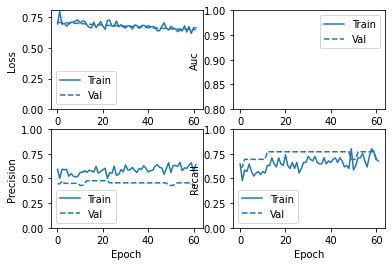

In [22]:
util.plot_metrics(nm1_resampled_history)

# Evaluate Model

loss :  27714.370442708332
tp :  17.0
fp :  43.0
tn :  0.0
fn :  0.0
accuracy :  0.28333333
precision :  0.28333333
recall :  1.0
auc :  0.5



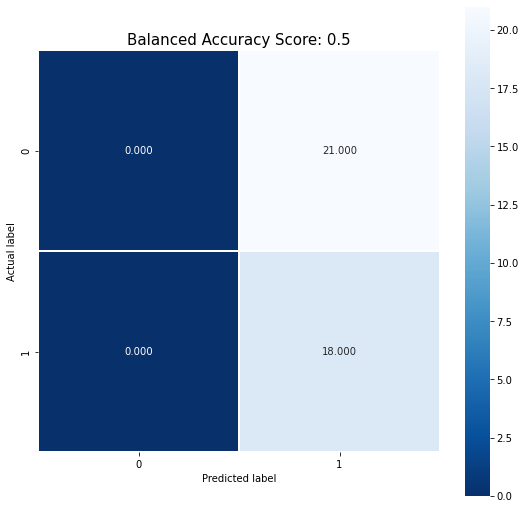

In [23]:
test_y = test.pop('DEATH_EVENT')
test_x = test
test_predictions_nm1 = model.predict(test_x, batch_size=mobj.BATCH_SIZE)


bscore_no_res = balanced_accuracy_score(test_y, test_predictions_nm1)

cm = confusion_matrix(test_y, test_predictions_nm1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Balanced Accuracy Score: {0}'.format(bscore_no_res)
plt.title(all_sample_title, size = 15);

nm1_results = model.evaluate(test_x, test_y,
                                  batch_size=mobj.BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, no_res_results):
  print(name, ': ', value)
print()

# OneSidedSelection

In [29]:
raw_df = df.copy(deep=True)
raw_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Using batch generator from imbalanced learn

In [30]:
train, test = train_test_split(nm1_df, test_size=0.2)

In [31]:
# set initial bias
neg, pos = np.bincount(raw_df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])

In [32]:
# Create Model
y = train.pop('DEATH_EVENT')
y_train = keras.utils.to_categorical(y, 3)
X_train = train
mobj = models.modelObj()
model = mobj.create_model(len(X.keys())-1, bias = initial_bias)

In [33]:
from imblearn.keras import balanced_batch_generator
from imblearn.under_sampling import OneSidedSelection

# fit the model using generator
training_generator, steps_per_epoch = balanced_batch_generator(
    X_train, y_train, sampler=OneSidedSelection(random_state=0), batch_size=mobj.BATCH_SIZE, random_state=42)

callback_history_oss = model.fit_generator(generator=training_generator,
                                        steps_per_epoch=steps_per_epoch,
                                        epochs=mobj.EPOCHS, verbose=0)

  ...
    to  
  ['...']


C:\Users\mmitk\Anaconda3\envs\tfGPU\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument:  Matrix size-incompatible: In[0]: [32,12], In[1]: [11,16]
	 [[node sequential_3/dense_6/MatMul (defined at <ipython-input-33-1e5e047ca10f>:10) ]]
	 [[metrics/tp/assert_greater_equal/Assert/AssertGuard/pivot_f/_3/_19]]
  (1) Invalid argument:  Matrix size-incompatible: In[0]: [32,12], In[1]: [11,16]
	 [[node sequential_3/dense_6/MatMul (defined at <ipython-input-33-1e5e047ca10f>:10) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_28903]

Function call stack:
distributed_function -> distributed_function


In [ ]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)